In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
# from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

We see there are one NULL value in CREDIT_LIMIT table and 313 NULL values in MINIMUM_PAYMENTS. So, having these empty and replacing with mean value makes more sense than replacing with 0. So, we do that in below code:

In [10]:
df = pd.read_csv("CC GENERAL.csv")

#fill null values with corresponding mean values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.drop('CUST_ID', axis=1, inplace=True) #As it is object type , we drop customer ID

EDA OF NUMERIC DATA
Here EDA is done only for numeric data as categorical is only customer ID which is unique hence EDA on this column does not give much insight

FIVE POINT SUMMARY

Pearson's correlation

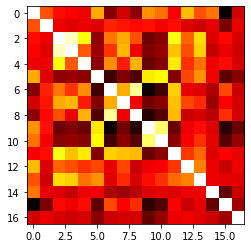

In [15]:
dfCorr = df.corr() #default gives pearson's correlation matrix
plt.imshow(dfCorr, cmap='hot', interpolation='nearest')
plt.show()

Check number of unique values for boxplot and histogram to get least numbers as grouping variable:

In [13]:
# for col in df.columns:
#   print(col, df[col].nunique())

BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 206
PAYMENTS 8711
MINIMUM_PAYMENTS 8637
PRC_FULL_PAYMENT 47
TENURE 7


Here least value is for tenure, hence i use that for boxplot and histogram

BOX PLOT

In [16]:
#separating values as df1 to be plotted as boxplot wrt tenure
df1 = df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

# for col in df1.columns:
#   plt.figure(figsize=(15,8))
#   plt.ax = sns.boxplot(x="TENURE", y=col, hue="TENURE", data = df)

HISTOGRAM

Plotting histogram for various values like tenure, number of transactions of purchases, advance payments in cash and frequency of balance purchases, purchase made, oneoff purchases made, purchase paid in installments, cash paid in advance.

<Figure size 1440x720 with 0 Axes>

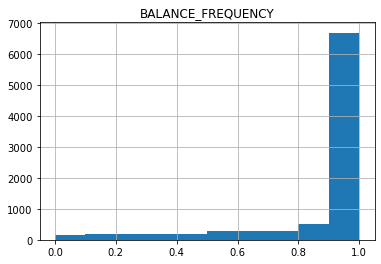

<Figure size 1440x720 with 0 Axes>

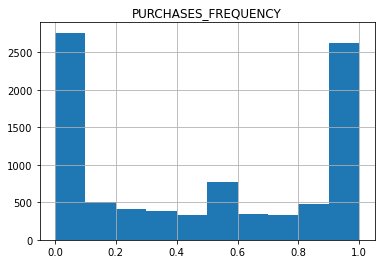

<Figure size 1440x720 with 0 Axes>

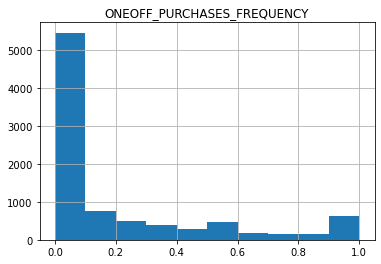

<Figure size 1440x720 with 0 Axes>

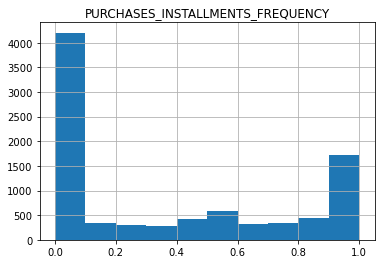

<Figure size 1440x720 with 0 Axes>

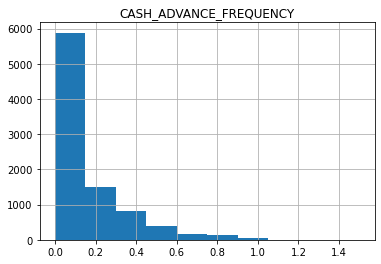

<Figure size 1440x720 with 0 Axes>

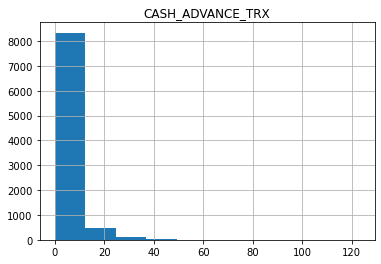

<Figure size 1440x720 with 0 Axes>

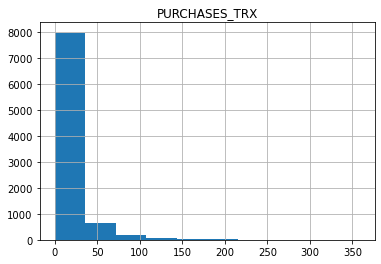

<Figure size 1440x720 with 0 Axes>

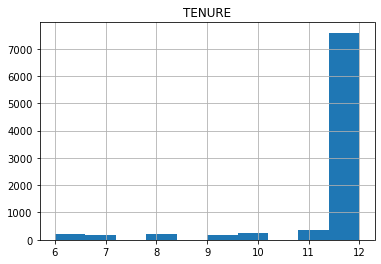

In [17]:
#separating df value as new data frame df2 to plot histogram
df2 = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']]
for col in df2.columns:
  plt.figure(figsize=(20,10))
  df2.hist(col)
  # print (df2[col].value_counts())

CLUSTERING - K-MEANS
NORMALIZATION

Normalization is required to be done for dimension reduction to happen as Principle component analysis uses scaled data to reduce dimension as large values will else dominate the results of PCA. StandardScaler in scikit-learn is used to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1)

In [18]:
temp = df
scale = StandardScaler() 
scaled = scale.fit_transform(df)
# Normalizing the scaled data
normalized = normalize(scaled) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized, columns = temp.columns)
normalized_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,2.045620e-17,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
5,0.053746,0.236216,0.070439,-0.162741,0.464979,-0.212827,0.200300,-0.309430,0.251125,-0.307920,-0.217060,-0.123079,-0.337651,-0.052460,3.018874e-01,-0.239621,0.164449
6,-0.061079,0.070277,0.386516,0.474842,0.041598,-0.063318,0.172252,0.362648,0.216928,-0.091610,-0.064578,0.268991,0.335747,0.216537,-3.877375e-02,0.392491,0.048925
7,0.047238,0.196541,-0.100678,-0.135407,0.010543,-0.177081,0.481730,-0.257458,0.606676,-0.256202,-0.180603,-0.041358,-0.228806,-0.138132,-5.407251e-02,-0.199374,0.136828
8,-0.154660,0.303481,-0.038854,0.024370,-0.136724,-0.273431,-0.229170,-0.233911,-0.168672,-0.395603,-0.278870,-0.228827,0.403388,-0.211425,-1.388098e-01,-0.307855,0.211277
9,-0.223745,-0.461903,0.042969,0.136921,-0.149902,-0.153929,-0.265951,-0.039563,-0.302391,-0.222705,-0.156990,-0.155352,0.589623,-0.064744,-1.080935e-01,-0.173307,0.118939


DIMENSION REDUCTION

Dimension reduction is done to get 17 columns/attributes to only two attributes for ease of visulisation of 2D as I can not visualise 17D for 17 attributes. hence, method used here for dimension reduction is principal component method

In [19]:
princi = PCA(n_components = 2)
princi_temp = princi.fit_transform(normalized_df) 
princi_temp = pd.DataFrame(princi_temp) #transforming it to pandas data frame data type
princi_temp.columns = ['P1', 'P2'] 
princi_temp.head()

,P1,P2
0,-0.489826,-0.679678
1,-0.518791,0.545011
2,0.330885,0.268978
3,-0.482374,-0.092111
4,-0.563289,-0.481915


In [20]:
#explaining the explained variances in PCA1 and PCA2
explained_variance = princi.explained_variance_ratio_
explained_variance

array([0.29040871, 0.18391053])

This array is vector of variances of PCA1 and PCA2 which is explained by them respectively.This shows that first PCA explains 29% variance while second explains 18% variance which together explains (29+18)% = 47% of variances in the data.

ELBOW METHOD

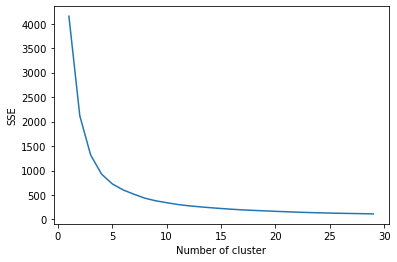

In [270]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000, init = 'random').fit(princi_temp)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

It is a bit difficult to understand here from elbow method as it can be 2 or 3 as both show a sharp elbow. So, trying to take both and checking.

Now that we know optimum number of clusters, we model the data and cluster the same. We repeat this twice for cluster size 2 and 3

DATA MODELLING

In [271]:
kmean3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) #3 cluster
kmean3.fit_predict(normalized_df)
df['cluster'] = kmean3
labels3=kmean3.labels_
clusters3=pd.concat([temp, pd.DataFrame({'cluster3':labels3})], axis=1)
# clusters3.head()

INTERPRETING CLUSTERS

In [272]:
# clusters3['cluster3'].value_counts()

In [273]:
# clusters3.groupby('cluster3').mean()

DOING SAME WITH CLUSTER SIZE OF 2

In [274]:
# kmean2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0) #2 cluster
# kmean2.fit_predict(normalized_df)
# labels2 = kmean2.labels_
# clusters2=pd.concat([temp, pd.DataFrame({'cluster2':labels2})], axis=1)
# clusters2.head()

In [275]:
# clusters2['cluster2'].value_counts()

In [276]:
# clusters2.groupby('cluster2').mean()

Here we see number of clusters as 2 is not that efficient to segment the customers as many parameters are nearly same in both cluster, hence we move on with number of clusters as 3!

CLUSTER VISUALISATION

In [277]:
# for c in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']:
#     grid= sns.FacetGrid(clusters3, col='cluster3')
#     grid.map(plt.hist, c)

In [278]:
visual3 = pd.concat([princi_temp, pd.DataFrame({'cluster3':labels3})], axis=1)  
# visual3.head(5)

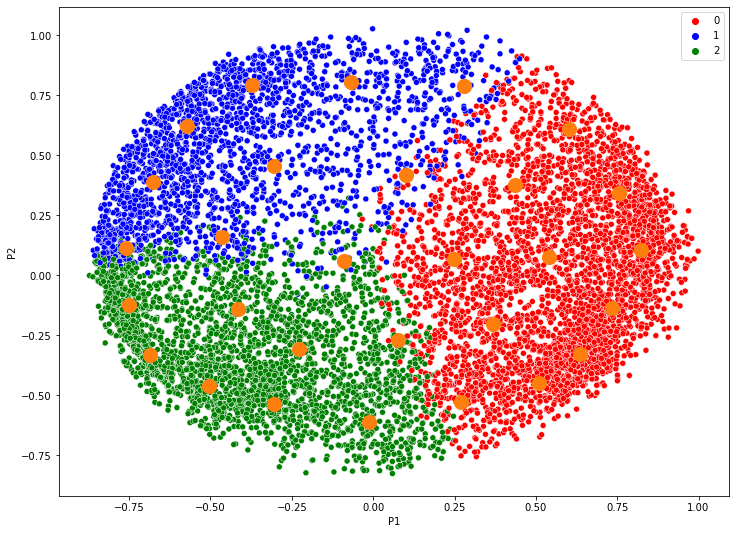

In [279]:
plt.figure(figsize=(12,9))
ax = sns.scatterplot(x="P1", y="P2", hue="cluster3", data=visual3, palette=['r','b','g'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200)
plt.legend()
plt.show()

INTERPRETATION OF 3 CLUSTER:

CLUSTER 0 (number : 3150): these customers have low balances and purchases with medium cash paid as advance also low purchase transactions indicate that they do not purchase that often. hence, this segment of people should not be targeted as of now by the company as they are least spenders with lowest credit limit.

CLUSTER 1 (number : 3746): this group has max number of customers having medium balances but are high purchasers with okish credit limit (close to highest mean of cluster 2). Hence, all these customers should be the first target of the company with most probability that this segment will purchase their services.

CLUSTER 2 (number : 2054): small number of people who have high balances and cash advances, medium purchase frequency. They also have high credit limit. This can indicate that these customer might use theur credit cards as loans and company can target this segment accordingly.